### Handling Skewed Data
Converting a skewed data to a gaussian distribution is a technique useful only if we use Linear or logistic regression.
Other Algorithims like SVM,RF,DT  etc dont require Gausian distribution as they dont work on the assumption that independent variables are normally distributed.

There are majorly 4 ways to convert skewed data to gausian as mentioned below.
Again it's purely hit & trial to choose which one to use. We can use Q-Q plot to check this.

1) Logrithmic transformation
2) Square root Transformation
3) Exponential Transformation
4) BoxCox Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
data=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [5]:
data['Age']=impute_na(data,'Age')

In [6]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Q-Q plot

In [7]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    


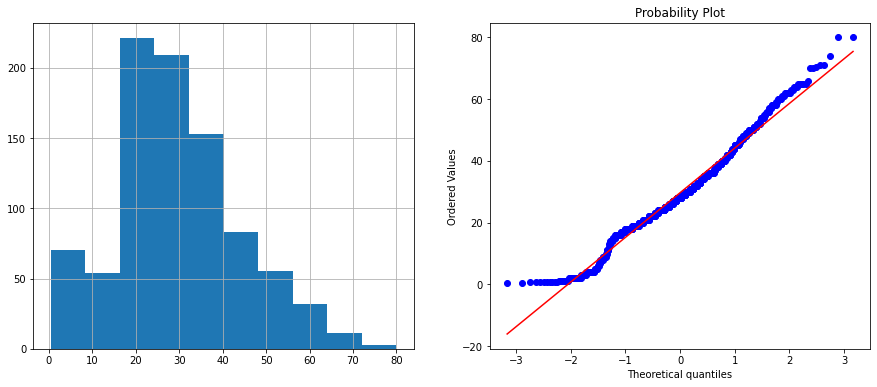

In [8]:
diagnostic_plots(data, 'Age')

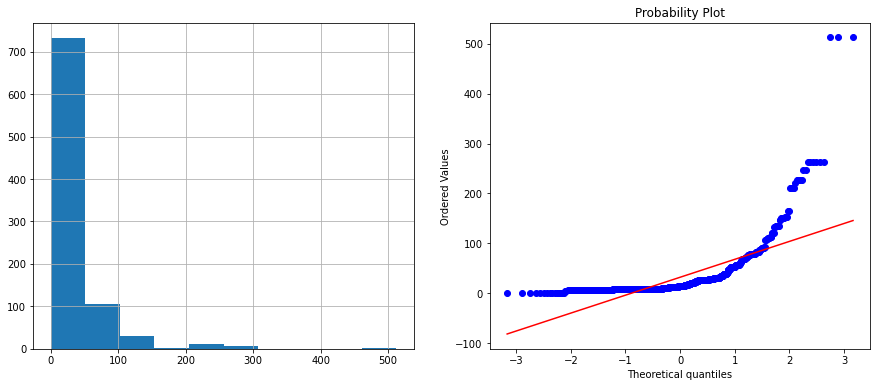

In [9]:
diagnostic_plots(data, 'Fare')

### Logarithmic Transformation

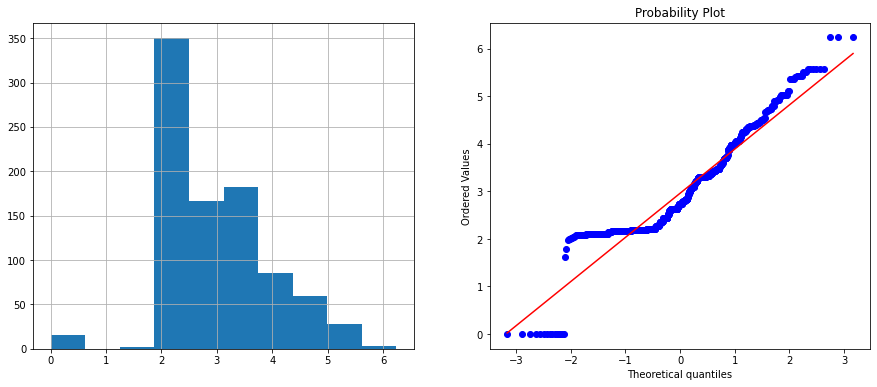

In [10]:
data['Log_Fare']=np.log(data['Fare']+1)
diagnostic_plots(data,'Log_Fare')

The logarithmic distribution does a good job in making Fare variable look Gaussian Distributed

### Reciprocal transformation

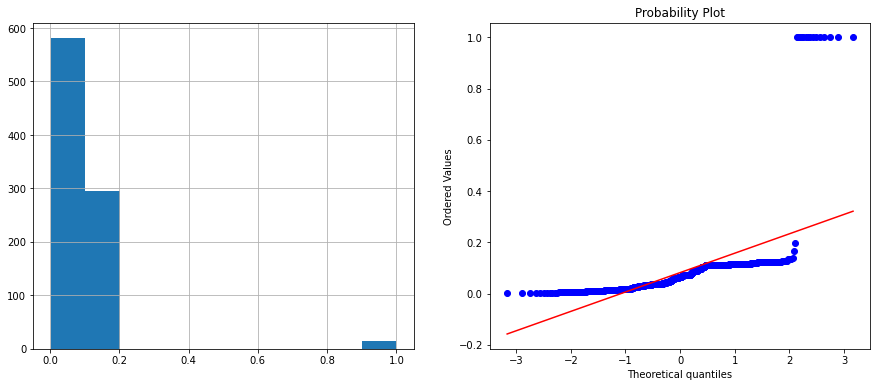

In [11]:
data['Rec_Fare']=1/(data['Fare']+1)
diagnostic_plots(data,'Rec_Fare')

### Sqaure Root Tansformation

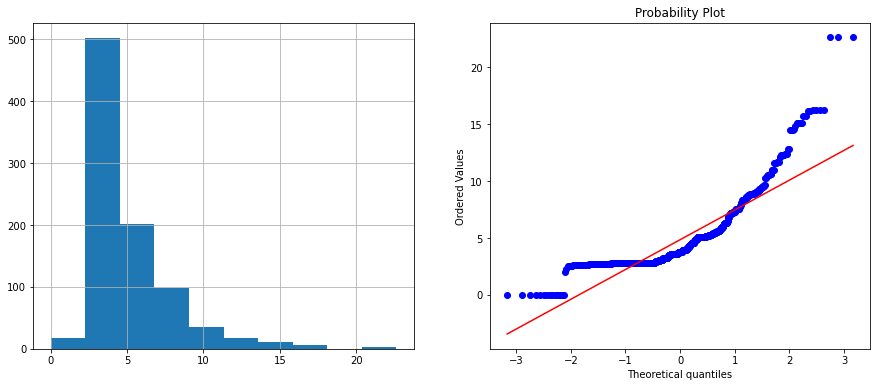

In [12]:
data['sqr_Fare']=data['Fare']**(1/2)
diagnostic_plots(data,'sqr_Fare')

### Exponential Tanformation

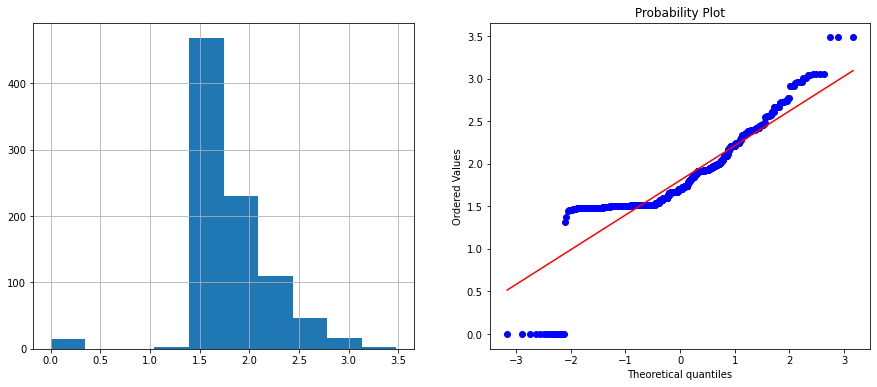

In [13]:
data['Exp_Fare']=data['Fare']**(1/5)
diagnostic_plots(data,'Exp_Fare')

## BoxCox

Optimal lambda:  -0.3184639580364978


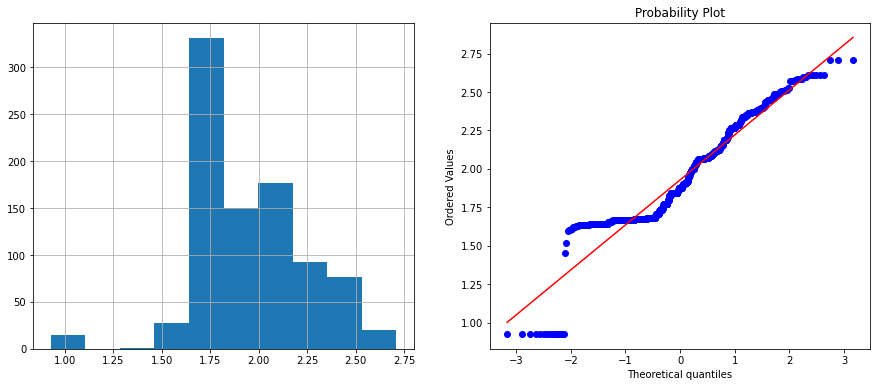

In [16]:
data['Fare_boxcox'], param = stats.boxcox(data.Fare+3) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_boxcox')